
# <center>*Desafio Tech - Data Analitycs - Frexco*</center>
---------------------------------------------------------------
## Autor: Victor Hugo Santos
## E-mail: victorhsantos.ti@gmail.com

## Bibliotecas Básicas

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Importação dos Dados

In [250]:
df = pd.read_excel("Dados.xlsx")

In [251]:
df

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


## Visualização e Análise Exploratória

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


Não temos valores nulos e os tipos dos dados estão corretamente atribuídos: datetime para Data e inteiro para Vendas.

In [253]:
# visualizando os dados
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [254]:
df.tail()

,Data,Vendas
41,2023-01-16,1692
42,2023-01-17,1097
43,2023-01-18,1302
44,2023-01-19,1405
45,2023-01-20,945


In [255]:
# estatísticas descritivas
df.describe()

,Vendas
count,46.000000
mean,755.434783
std,430.762201
min,18.000000
25%,346.500000
50%,810.500000
75%,1053.750000
max,1692.000000


Podemos perceber uma grande variação nos valores de Vendas, de acordo com o desvio padrão e a amplitude (max - min), indicando que a série temporal provavelmente não é estacionária.

Visualmente podemos tirar essa prova melhor.

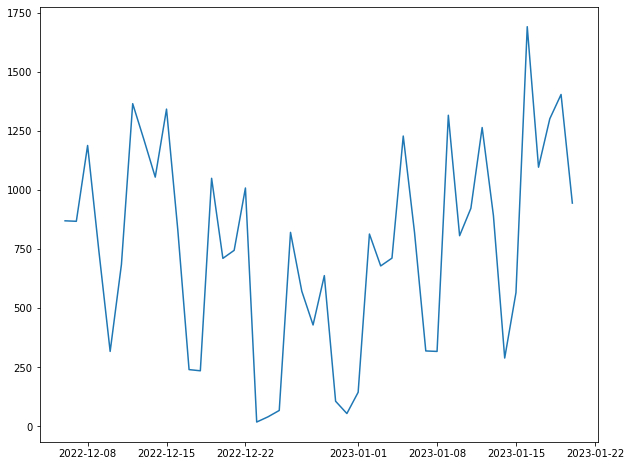

In [256]:
df = df.set_index('Data')

plt.figure(figsize=(10, 8))
plt.plot(df)

Realmente os dados estão variando bastante no tempo, indicando ser uma série não estacionária.

Neste caso, uma boa abordagem é utilizar o modelo ARIMA, modelo este já conhecido e utilizado nessas situações.

## ARIMA

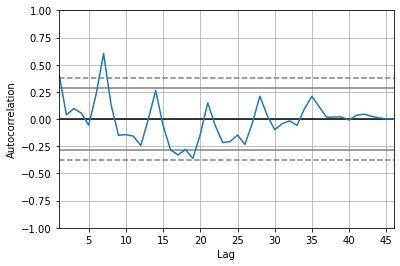

In [257]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

Avaliando o gráfico de autocorrelação, percebemos que por volta de 7 Lags há uma alta correlação, acima do nível de significância. Usaremos este valor no modelo ARIMA.

Será dividido o dataframe em treino e teste para validar o modelo com os dados de teste. 

Considerando que temos 46 dados, separaremos 9 para teste para enriquecer o máximo o treinamento.

In [258]:
9/46

0.1956521739130435

9 valores representam aproximadamente 20% dos dados, o que é uma porcentagem aceita e dentro dos padrões

In [259]:
# dividindo o dataframe em treino e teste
quantidade_treinamento = 46 - 9
train = df.iloc[0:quantidade_treinamento]
test = df.iloc[quantidade_treinamento:46]

In [260]:
from statsmodels.tsa.arima.model import ARIMA

# declarando e configurando o modelo
model = ARIMA (train, order=(7, 1, 1))  # 7 lags, 1 nível de diferenciação e 1 nível de média móvel (padrão)

# executando o modelo
fit = model.fit()

# erros entre a previsão e o valor real
residuos = pd.DataFrame(fit.resid)

C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


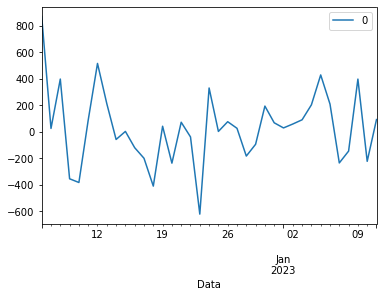

In [261]:
residuos.plot()
plt.show()

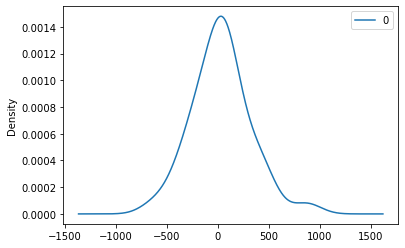

In [262]:
residuos.plot(kind="kde")
plt.show()

Podemos observar no primeiro gráfico uma aleatoriedade nos dados, mostrando que não há nenhuma tendência de erro.

Além disso, observando o segundo gráfico, temos uma distribuição normal identificando os residuos.

In [263]:
residuos.describe()

,0
count,37.000000
mean,30.503977
std,284.872522
min,-621.021208
25%,-145.636535
50%,29.150194
75%,193.836418
max,870.000000


Outro detalhe é quanto ao erro médio, que é de 30 unidades

Além de separar em teste e treino, podemos criar uma nova coluna no dataset de teste e acrescentar ali a previsão do modelo para os próximos 9 dias, que é exatamente a quantidade de dias do dataset de teste

In [264]:
test['Previsao'] = fit.predict(start=quantidade_treinamento,end=len(df)-1,dynamic=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_7200\3575104900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Previsao'] = fit.predict(start=quantidade_treinamento,end=len(df)-1,dynamic=True)


In [265]:
test

,Vendas,Previsao
Data,,
2023-01-12,1265,1358.761962
2023-01-13,892,1010.081913
2023-01-14,289,478.411900
2023-01-15,566,513.811194
2023-01-16,1692,1335.102558
2023-01-17,1097,907.889119
2023-01-18,1302,948.808619
2023-01-19,1405,1360.233486
2023-01-20,945,1075.847906


<AxesSubplot:xlabel='Data'>

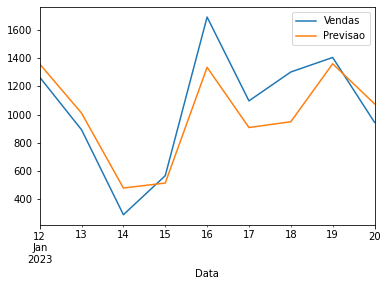

In [266]:
test.plot()

# Avaliando o Modelo

Apenas analisando visualmente os valores, podemos perceber que o modelo tem uma tendência de comportamento correto, já que para valores reais baixos, os valores de previsão também foram menores (o mesmo vale para valores maiores)... enfim, iremos avaliar melhor mais a frente com uma métrica recomendada pela literatura, denominada **root mean squared error ou RMSE**.

In [267]:
# Avaliando o modelo
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Vendas'], test['Previsao']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 202.304


O modelo proposto está apresentando uma variação de aproximadamente 202 unidades (pra mais ou pra menos) de acordo com o esperado.

Podemos ainda melhorar essa métrica...

# Melhorando o Modelo

Já que os dados estão bem limpos, ou seja, não existem muitas alterações para fazer na base de dados em si, o que podemos fazer é modificar os parâmetros passados para o ARIMA, com o objetivo de diminuir o RMSE, indicando uma melhora no modelo.

In [220]:
model_melhorado = ARIMA (train, order=(40, 1, 1))

# executando o modelo
fit_melhorado = model_melhorado.fit()

# resetando o teste
test = df.iloc[quantidade_treinamento:46]

test['Previsao'] = fit_melhorado.predict(start=quantidade_treinamento,end=len(df)-1,dynamic=True)

C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarni

<AxesSubplot:xlabel='Data'>

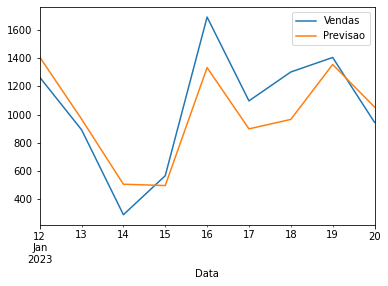

In [206]:
test.plot()

In [221]:
rmse = np.sqrt(mean_squared_error(test['Vendas'], test['Previsao']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 560.066


# Tarefa: Prever os 5 próximos dias após o último dia da base de dados

In [269]:
previsao = fit.predict(start=len(df)-1, end= len(df)+4, dynamic=True)
previsao = pd.DataFrame(previsao)

previsao

C:\Users\victo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,predicted_mean
2023-01-20,1075.847906
2023-01-21,548.385501
2023-01-22,612.553388
2023-01-23,1304.572627
2023-01-24,946.063634
2023-01-25,939.109100


Podemos visualizar a projeção no gráfico também

<AxesSubplot:>

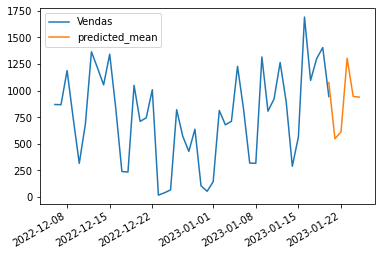

In [270]:
pd.concat([df, previsao]).plot()

In [271]:
previsao.tail(5)

,predicted_mean
2023-01-21,548.385501
2023-01-22,612.553388
2023-01-23,1304.572627
2023-01-24,946.063634
2023-01-25,939.109100


Acima estão disponibilizados os 5 valores de previsão (coluna 'predicted_mean' de demanda para os dias 21/01/2023 até 25/01/2023.